In [31]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
df = pd.read_csv('Feline UTI Data.csv')
pd.options.display.max_columns = None
df

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,Lipid Layer,WBC,Pyuria,RBC,Crystals,Epithelial cells transitional,Epithelial cells squamous,Epithelial cells renal,Epithealial cells caudate,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,Not Present,0,0,2,0,2,0,0,0,0,0,0,0,0,0
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,Not Present,2,0,0,0,1,1,0,0,0,0,0,0,0,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,Negative,3,0,5,1,1,1,0,0,1,0,0,0,0,0
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,Pos,3,0,8,0,1,1,0,0,1,0,0,0,0,0
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,Floc,3,0,8,0,2,2,0,0,0,0,0,0,0,0
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,Floc,3,0,5,0,1,1,0,0,0,0,0,0,2,1


In [2]:
from pycaret.classification import * 

['Visit Number ', 'sex', 'Age ', 'BW', 'Color', 'Clarity ', 'USG', 'ph', 'Protein', 'Glucose', 'Ketones', 'Bilirubin', 'Hemoprotein', 'Lipid Layer', 'WBC', 'Pyuria', 'RBC', 'Crystals', 'Epithelial cells transitional ', 'Epithelial cells squamous', 'Epithelial cells renal', 'Epithealial cells caudate', 'Casts hyaline', 'Cast granular ', 'Cast waxy', 'Cast cellular', 'Sed Bac Quantity ', 'Sed Bac Type']

In [33]:
exp1_clf = setup(df, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' , 'Bilirubin', 'Hemoprotein', 'ph', 'WBC', 'RBC'], ignore_features =['Visit Number', 'BW'])

,Description,Value
0,Session id,3373
1,Target,Positive culture
2,Target type,Binary
3,Original data shape,"(4052, 29)"
4,Transformed data shape,"(5850, 46)"
5,Transformed train set shape,"(4634, 46)"
6,Transformed test set shape,"(1216, 46)"
7,Ignore features,2
8,Numeric features,8
9,Categorical features,4


In [34]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9298,0.9027,0.7783,0.8303,0.8026,0.7600,0.7612,0.1160
ridge,Ridge Classifier,0.9291,0.0000,0.7456,0.8509,0.7939,0.7514,0.7543,0.0420
lda,Linear Discriminant Analysis,0.9266,0.9020,0.7360,0.8455,0.7862,0.7422,0.7453,0.0530
lr,Logistic Regression,0.9228,0.8978,0.7821,0.7982,0.7883,0.7412,0.7425,0.5090
rf,Random Forest Classifier,0.8939,0.8876,0.6341,0.7980,0.6839,0.6236,0.6435,0.1180
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0530
svm,SVM - Linear Kernel,0.7920,0.0000,0.7590,0.5752,0.6101,0.4960,0.5320,0.0430
knn,K Neighbors Classifier,0.7874,0.7775,0.6511,0.4442,0.5274,0.3965,0.4092,0.0530
dt,Decision Tree Classifier,0.5389,0.5595,0.5920,0.2225,0.3155,0.0746,0.0966,0.0490
ada,Ada Boost Classifier,0.5223,0.7623,0.6402,0.2355,0.3262,0.0896,0.1220,0.0830


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [35]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3373, verbose=0, warm_start=False)


In [36]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9366,0.9175,0.7308,0.9048,0.8085,0.7710,0.7774
1,0.9120,0.9060,0.7885,0.7455,0.7664,0.7122,0.7126
2,0.9225,0.9053,0.7500,0.8125,0.7800,0.7331,0.7339
3,0.9296,0.8938,0.7692,0.8333,0.8000,0.7573,0.7582
4,0.9366,0.9013,0.8077,0.8400,0.8235,0.7849,0.7851
5,0.9261,0.9182,0.7692,0.8163,0.7921,0.7472,0.7476
6,0.9187,0.8925,0.7885,0.7736,0.7810,0.7311,0.7311
7,0.9293,0.8930,0.7115,0.8810,0.7872,0.7454,0.7515
8,0.9329,0.9280,0.8077,0.8235,0.8155,0.7745,0.7746


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9472,0.9378,0.8077,0.8936,0.8485,0.8166,0.8181
1,0.9049,0.9137,0.8077,0.7119,0.7568,0.6980,0.7001
2,0.9401,0.9184,0.7500,0.9070,0.8211,0.7855,0.7906
3,0.9296,0.8908,0.7692,0.8333,0.8000,0.7573,0.7582
4,0.9507,0.9378,0.8462,0.8800,0.8627,0.8327,0.8330
5,0.9225,0.9523,0.8654,0.7500,0.8036,0.7556,0.7586
6,0.9187,0.9087,0.8269,0.7544,0.7890,0.7388,0.7400
7,0.9293,0.9188,0.7692,0.8333,0.8000,0.7572,0.7581
8,0.9329,0.9282,0.8077,0.8235,0.8155,0.7745,0.7746


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


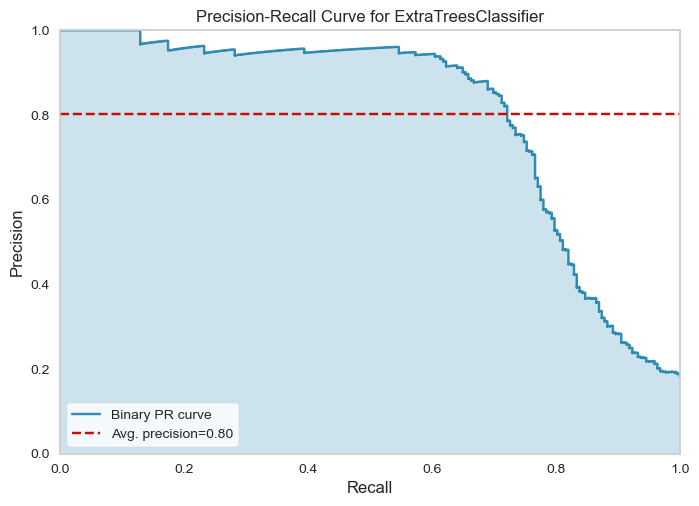

In [39]:
plot_model(tuned_et, plot = 'pr')

In [40]:
scores_data1 = predict_model(tuned_et, raw_score = True, data = df)
scores_data1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9287,0.9314,0.7817,0.8204,0.8006,0.7572,0.7575


,Visit Number,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,...,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type,Positive culture,prediction_label,prediction_score_0,prediction_score_1
0,3870BO,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,...,0,0,0,0,0,0,0,0,0.8276,0.1724
1,50690EM,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,...,0,0,0,0,0,0,0,0,0.8577,0.1423
2,3999BO,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,...,0,0,0,0,0,0,0,0,0.8307,0.1693
3,50719EM,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,...,0,0,0,0,0,0,0,0,0.7925,0.2075
4,4316BO,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,...,0,0,0,0,0,0,0,0,0.8326,0.1674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,...,1,0,0,0,0,0,0,0,0.8058,0.1942
4048,1033DM,4,7.8,2.7,Straw,Clear,1.016,6,100,0,...,1,0,0,0,0,0,0,0,0.8564,0.1436
4049,1052DM,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,...,0,0,0,0,0,0,0,0,0.8963,0.1037
4050,1071DM,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,...,0,0,0,0,2,1,1,1,0.3906,0.6094


In [41]:
scores_data1.to_csv('scores_data1.csv')

In [42]:
predict_model(tuned_et, probability_threshold = 0.759)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9161,0.8809,0.5740,0.9481,0.7151,0.6694,0.6984


,Visit Number,sex,Age,Color,Clarity,USG,ph,Protein,Glucose,Ketones,...,Epithealial cells caudate,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type,Positive culture,prediction_label,prediction_score
3250,4643CZ,2,12.3,Yellow,SLHazy,1.008,7,25,50,0,...,0,0,0,0,0,0,0,0,0,0.7496
304,1242BS,2,15.3,Yellow,Clear,1.016,5,25,0,0,...,0,0,0,0,0,0,0,0,0,0.8019
3355,519760M,2,6.4,Yellow,SLHazy,1.026,7,25,0,0,...,0,0,0,0,0,0,0,0,0,0.8463
2055,6408CJ,4,16.6,Yellow,Cloudy,1.010,6,75,0,0,...,0,0,0,0,0,3,2,0,1,0.9123
2581,536CQ,4,18.1,Straw,SLHazy,1.018,5,25,0,0,...,2,0,0,0,0,0,0,0,0,0.8233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,3218CG,2,5.9,Amber,Cloudy,1.024,7,25,0,0,...,1,0,0,0,0,0,0,0,0,0.8160
2160,5883CK,4,9.8,Yellow,SLHazy,1.040,5,25,1000,0,...,0,0,0,0,0,0,0,0,0,0.7977
2096,70274EM,4,14.9,Yellow,Hazy,1.017,6,25,0,0,...,0,0,0,0,0,2,2,1,1,0.9584
1146,65251EM,2,0.0,Yellow,Hazy,1.038,6,150,0,0,...,0,0,0,0,0,0,0,0,0,0.7173


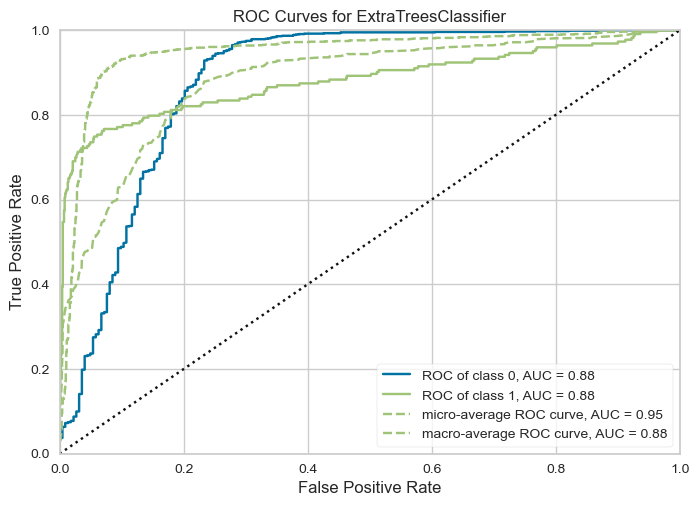

In [43]:
plot_model(tuned_et)

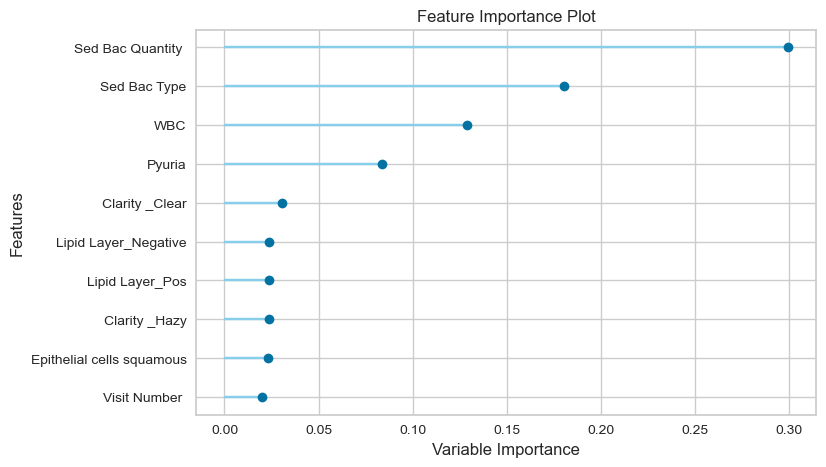

In [44]:
plot_model(tuned_et, plot='feature')

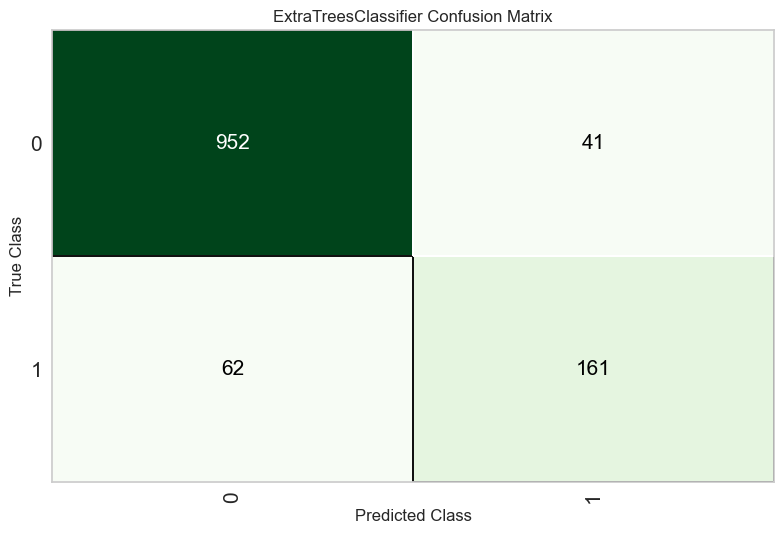

In [45]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [46]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [47]:
data2 = pd.read_csv('Feline UTI Data_limited.csv')
pd.options.display.max_columns = None
data2

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,Lipid Layer,WBC,RBC
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,Not Present,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,Not Present,0,2
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,Not Present,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,Not Present,2,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,Not Present,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,Negative,3,5
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,Pos,3,8
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,Floc,3,8
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,Floc,3,5


In [48]:
#fix classification imbalance, excluding visit number and bw (includes NaN), not including lipid layer, ph, hemoprotein
exp1_clf = setup(data2, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' , 'Bilirubin', 'WBC','RBC'], ignore_features =['Visit Number', 'BW'])

,Description,Value
0,Session id,3950
1,Target,Positive culture
2,Target type,Binary
3,Original data shape,"(4052, 17)"
4,Transformed data shape,"(5850, 33)"
5,Transformed train set shape,"(4634, 33)"
6,Transformed test set shape,"(1216, 33)"
7,Ignore features,2
8,Numeric features,6
9,Categorical features,4


In [49]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8678,0.7884,0.4449,0.7312,0.5460,0.4754,0.4986,0.1200
rf,Random Forest Classifier,0.8473,0.7594,0.3722,0.6891,0.4646,0.3887,0.4224,0.1220
lda,Linear Discriminant Analysis,0.8184,0.7671,0.5490,0.5023,0.5228,0.4113,0.4130,0.0620
ridge,Ridge Classifier,0.8170,0.0000,0.5510,0.5017,0.5230,0.4106,0.4126,0.0510
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0640
lr,Logistic Regression,0.8124,0.7783,0.5972,0.4891,0.5362,0.4203,0.4248,0.4180
knn,K Neighbors Classifier,0.7451,0.7383,0.5952,0.3770,0.4612,0.3055,0.3192,0.0660
svm,SVM - Linear Kernel,0.6879,0.0000,0.6163,0.4807,0.4657,0.3115,0.3431,0.0550
dt,Decision Tree Classifier,0.4200,0.5265,0.6942,0.2034,0.3085,0.0378,0.0412,0.0590
ada,Ada Boost Classifier,0.4027,0.6717,0.7095,0.1943,0.2942,0.0219,0.0486,0.0890


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [50]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3950, verbose=0, warm_start=False)


In [51]:
et2 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8944,0.8673,0.5769,0.7895,0.6667,0.6057,0.6162
1,0.8486,0.7305,0.2885,0.7143,0.4110,0.3416,0.3881
2,0.8838,0.8200,0.5192,0.7714,0.6207,0.5552,0.5703
3,0.8627,0.7600,0.3846,0.7407,0.5063,0.4357,0.4674
4,0.8662,0.7419,0.3462,0.8182,0.4865,0.4238,0.4758
5,0.8908,0.7877,0.5385,0.8000,0.6437,0.5821,0.5980
6,0.8233,0.7729,0.3725,0.5135,0.4318,0.3303,0.3363
7,0.8905,0.8340,0.5577,0.7838,0.6517,0.5889,0.6009
8,0.8869,0.7991,0.5192,0.7941,0.6279,0.5647,0.5824


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
tuned_et2=tune_model(et2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8944,0.8890,0.6923,0.7200,0.7059,0.6415,0.6417
1,0.8486,0.7526,0.3654,0.6552,0.4691,0.3890,0.4116
2,0.8979,0.8276,0.5769,0.8108,0.6742,0.6156,0.6282
3,0.8521,0.7799,0.4808,0.6250,0.5435,0.4570,0.4626
4,0.8908,0.8578,0.5385,0.8000,0.6437,0.5821,0.5980
5,0.8979,0.7911,0.5962,0.7949,0.6813,0.6220,0.6311
6,0.8375,0.7908,0.4118,0.5676,0.4773,0.3839,0.3908
7,0.8799,0.8770,0.5577,0.7250,0.6304,0.5602,0.5670
8,0.8834,0.8060,0.5577,0.7436,0.6374,0.5696,0.5779


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


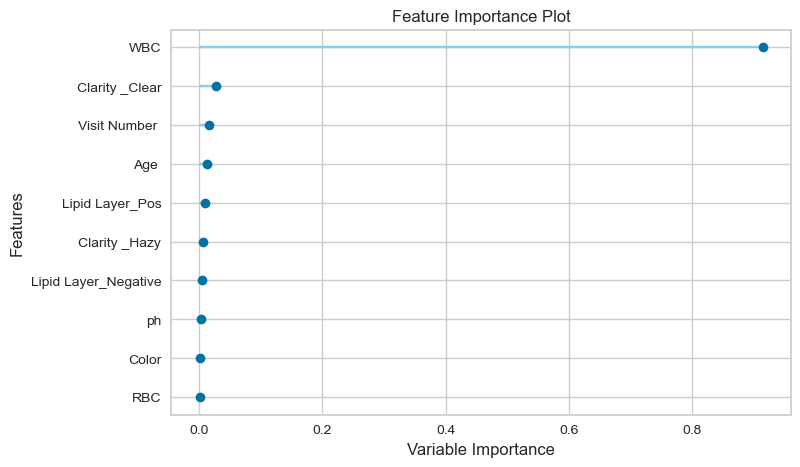

In [53]:
plot_model(tuned_et2, plot = 'feature')

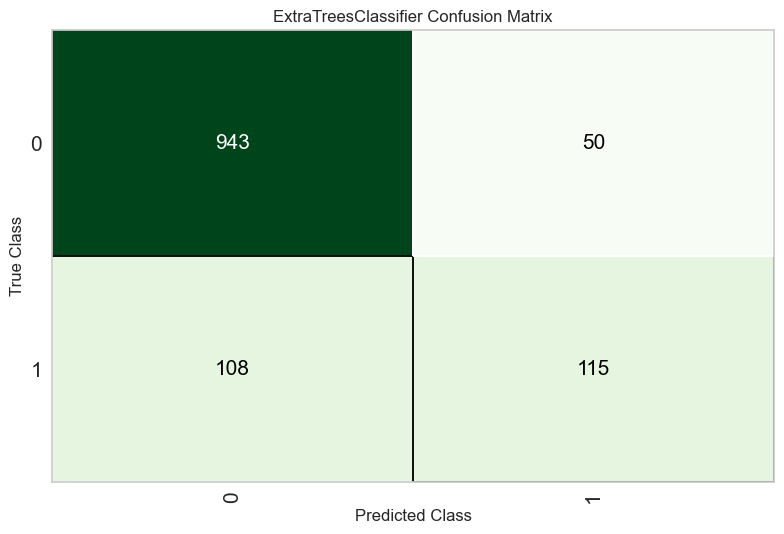

In [54]:
plot_model(tuned_et2 , plot = 'confusion_matrix')

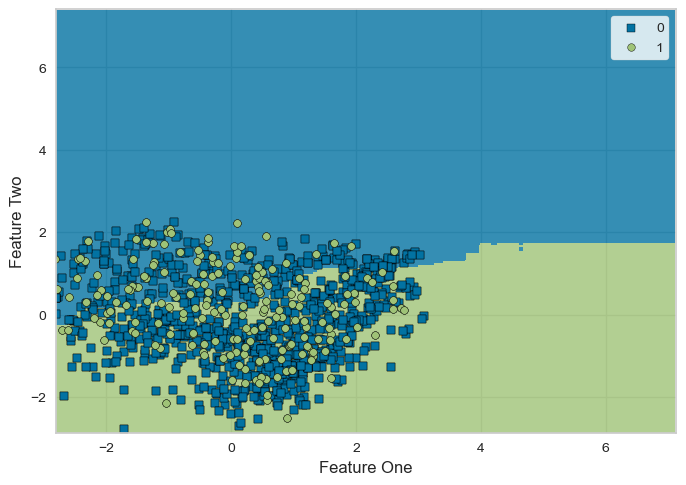

In [55]:
plot_model(tuned_et2 , plot = 'boundary', use_train_data = True)

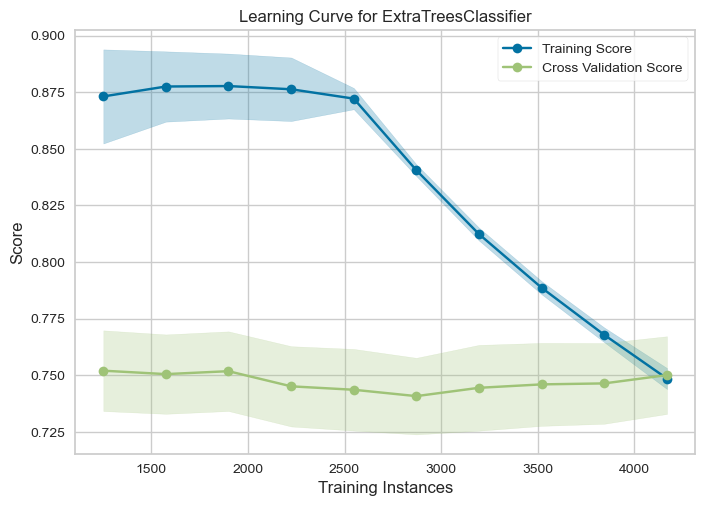

In [56]:
plot_model(tuned_et2, plot = 'learning', use_train_data = True)

In [58]:
#deleted lipid layer, ect, ecs, ecr, ecc, ch, cw, cg, cc, sbq, sbt
data3 = pd.read_csv('4.12.23.csv')
pd.options.display.max_columns = None
data3

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,WBC,Pyuria,RBC,Crystals
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,0,0,2,0
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,0,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,2,0,0,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,3,0,5,1
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,3,0,8,0
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,3,0,8,0
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,3,0,5,0


In [64]:
#Include all features and fix classification imbalance
exp1_clf = setup(data3, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' , 'Bilirubin', 'Hemoprotein', 'ph', 'Pyuria', 'WBC', 'RBC', 'Crystals'], ignore_features =['Visit Number', 'BW'])

,Description,Value
0,Session id,1130
1,Target,Positive culture
2,Target type,Binary
3,Original data shape,"(4052, 18)"
4,Transformed data shape,"(5850, 26)"
5,Transformed train set shape,"(4634, 26)"
6,Transformed test set shape,"(1216, 26)"
7,Ignore features,2
8,Numeric features,10
9,Categorical features,3


In [65]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8590,0.7682,0.4587,0.6707,0.5430,0.4633,0.4759,0.1340
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0720
lr,Logistic Regression,0.8043,0.7867,0.6495,0.4757,0.5479,0.4271,0.4365,0.4320
lda,Linear Discriminant Analysis,0.7895,0.7882,0.6629,0.4494,0.5351,0.4056,0.4188,0.0710
ridge,Ridge Classifier,0.7891,0.0000,0.6668,0.4491,0.5363,0.4066,0.4202,0.0610
knn,K Neighbors Classifier,0.7356,0.7280,0.6031,0.3656,0.4543,0.2937,0.3105,0.0730
rf,Random Forest Classifier,0.7166,0.7158,0.5045,0.4752,0.4206,0.2677,0.2945,0.1330
qda,Quadratic Discriminant Analysis,0.7028,0.5475,0.3146,0.2846,0.2566,0.0993,0.1076,0.0750
svm,SVM - Linear Kernel,0.6936,0.0000,0.6203,0.3548,0.4340,0.2593,0.2865,0.0680
dt,Decision Tree Classifier,0.5688,0.5427,0.5014,0.2195,0.2837,0.0568,0.0693,0.0710


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [66]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1130, verbose=0, warm_start=False)


In [67]:
et3 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8486,0.8474,0.5000,0.6047,0.5474,0.4574,0.4604
1,0.8803,0.7960,0.4808,0.7812,0.5952,0.5296,0.5511
2,0.8415,0.7055,0.4231,0.5946,0.4944,0.4036,0.4118
3,0.8768,0.8003,0.5192,0.7297,0.6067,0.5361,0.5470
4,0.8239,0.7196,0.3846,0.5263,0.4444,0.3428,0.3488
5,0.8627,0.7768,0.4615,0.6857,0.5517,0.4743,0.4872
6,0.8940,0.7840,0.5385,0.8235,0.6512,0.5919,0.6105
7,0.8410,0.7515,0.4038,0.6000,0.4828,0.3930,0.4038
8,0.8445,0.7568,0.3654,0.6333,0.4634,0.3801,0.3998


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
tuned_et3 = tune_model(et3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7923,0.8079,0.6731,0.4545,0.5426,0.4147,0.4281
1,0.7958,0.8089,0.6154,0.4571,0.5246,0.3981,0.4053
2,0.7887,0.7378,0.6346,0.4459,0.5238,0.3933,0.4034
3,0.7958,0.8283,0.6923,0.4615,0.5538,0.4282,0.4430
4,0.7641,0.7604,0.6538,0.4096,0.5037,0.3595,0.3764
5,0.7923,0.7981,0.6538,0.4533,0.5354,0.4072,0.4186
6,0.8057,0.8681,0.7692,0.4819,0.5926,0.4737,0.4960
7,0.7809,0.7679,0.6154,0.4324,0.5079,0.3725,0.3821
8,0.7880,0.7850,0.5769,0.4412,0.5000,0.3685,0.3738


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


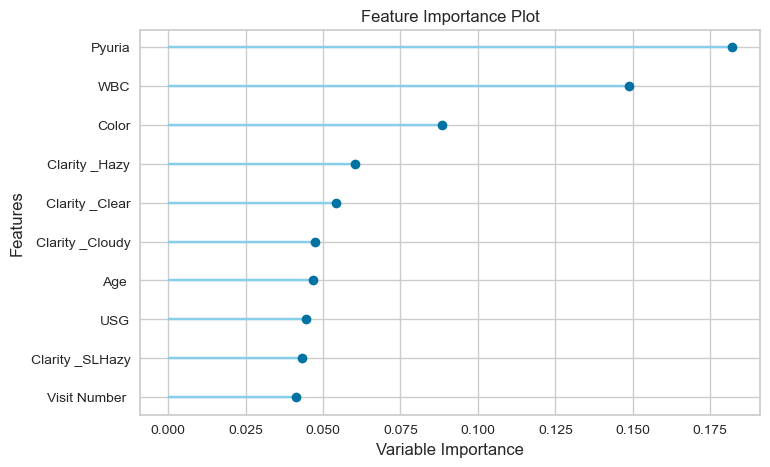

In [69]:
plot_model(et3, plot = 'feature')

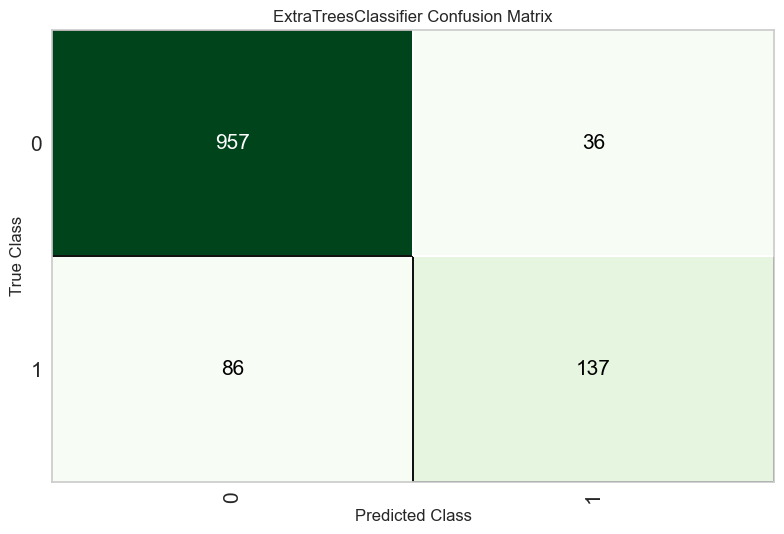

In [70]:
plot_model(et3 , plot = 'confusion_matrix')

In [71]:
data4 = pd.read_csv('nb.4.12.csv')
pd.options.display.max_columns = None
data4

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Hemoprotein,WBC,Pyuria,RBC
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,25,0,0,2
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,150,2,0,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,150,3,0,5
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,50,3,0,8
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,25,3,0,8
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,3,0,5


In [73]:
#fix classification imbalance, excluding visit number and bw (includes NaN), not including lipid layer, ph, hemoprotein
exp1_clf = setup(data4, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' ,'Hemoprotein',  'WBC','RBC','Pyuria'], ignore_features =['Visit Number', 'BW'])

,Description,Value
0,Session id,1045
1,Target,Positive culture
2,Target type,Binary
3,Original data shape,"(4052, 16)"
4,Transformed data shape,"(5850, 24)"
5,Transformed train set shape,"(4634, 24)"
6,Transformed test set shape,"(1216, 24)"
7,Ignore features,2
8,Numeric features,7
9,Categorical features,3


In [74]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8632,0.7807,0.4719,0.6830,0.5566,0.4792,0.4914,0.1340
rf,Random Forest Classifier,0.8399,0.7281,0.3372,0.6215,0.4234,0.3435,0.3708,0.1390
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0790
lr,Logistic Regression,0.7923,0.7850,0.6472,0.4541,0.5321,0.4043,0.4161,0.5250
lda,Linear Discriminant Analysis,0.7895,0.7899,0.6666,0.4505,0.5364,0.4071,0.4212,0.0820
ridge,Ridge Classifier,0.7891,0.0000,0.6666,0.4500,0.5361,0.4066,0.4206,0.0750
qda,Quadratic Discriminant Analysis,0.7852,0.5234,0.1270,0.2809,0.1529,0.0696,0.0832,0.0820
knn,K Neighbors Classifier,0.7352,0.7165,0.5567,0.3591,0.4352,0.2735,0.2854,0.1020
svm,SVM - Linear Kernel,0.6538,0.0000,0.6605,0.3771,0.4377,0.2575,0.2906,0.0780
dt,Decision Tree Classifier,0.5673,0.5673,0.5670,0.2282,0.3212,0.0856,0.1068,0.0810


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [75]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1045, verbose=0, warm_start=False)


In [76]:
et4 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8592,0.7877,0.5000,0.6500,0.5652,0.4829,0.4888
1,0.8732,0.8345,0.5769,0.6818,0.6250,0.5494,0.5521
2,0.8592,0.7455,0.4615,0.6667,0.5455,0.4654,0.4764
3,0.8556,0.7945,0.4808,0.6410,0.5495,0.4656,0.4724
4,0.8732,0.7947,0.4808,0.7353,0.5814,0.5105,0.5265
5,0.8697,0.7778,0.5000,0.7027,0.5843,0.5096,0.5200
6,0.8657,0.7268,0.4118,0.7241,0.5250,0.4536,0.4782
7,0.8622,0.7666,0.4808,0.6757,0.5618,0.4828,0.4926
8,0.8551,0.7841,0.4423,0.6571,0.5287,0.4470,0.4592


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [78]:
tuned_et4 = tune_model(et4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8275,0.7922,0.6923,0.5217,0.5950,0.4882,0.4960
1,0.8099,0.8497,0.7500,0.4875,0.5909,0.4742,0.4929
2,0.8063,0.7786,0.5577,0.4754,0.5133,0.3934,0.3953
3,0.8486,0.8343,0.6538,0.5763,0.6126,0.5190,0.5206
4,0.8275,0.8092,0.6538,0.5231,0.5812,0.4742,0.4789
5,0.8486,0.7878,0.6538,0.5763,0.6126,0.5190,0.5206
6,0.8163,0.7843,0.5882,0.4918,0.5357,0.4223,0.4249
7,0.8163,0.8167,0.6154,0.5000,0.5517,0.4377,0.4415
8,0.8198,0.8117,0.6538,0.5075,0.5714,0.4596,0.4655


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


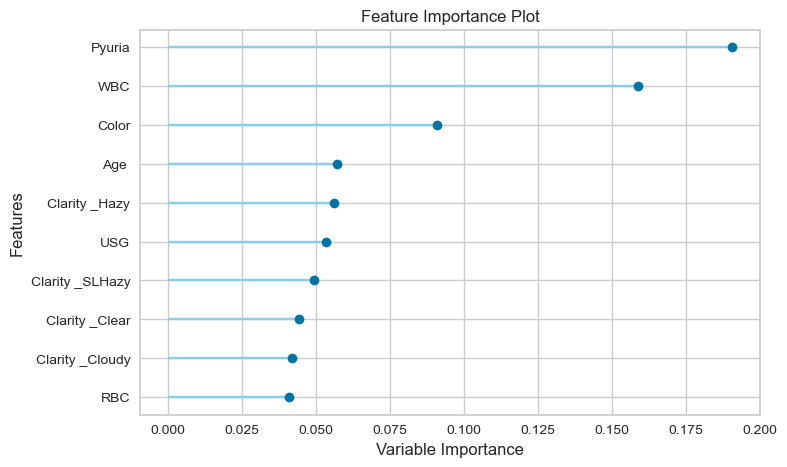

In [79]:
plot_model(et4, plot = 'feature')

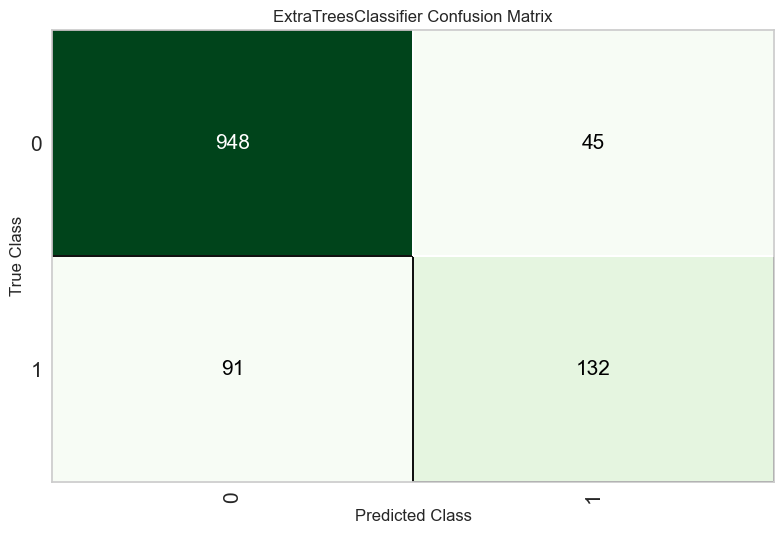

In [80]:
plot_model(et4 , plot = 'confusion_matrix')

In [85]:
#taken out lipid layer 
data5 = pd.read_csv('no_ll.csv')
pd.options.display.max_columns = None
data5

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,WBC,Pyuria,RBC,Crystals,Epithelial cells transitional,Epithelial cells squamous,Epithelial cells renal,Epithealial cells caudate,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,0,0,2,0,2,0,0,0,0,0,0,0,0,0
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,2,0,0,0,1,1,0,0,0,0,0,0,0,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,3,0,5,1,1,1,0,0,1,0,0,0,0,0
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,3,0,8,0,1,1,0,0,1,0,0,0,0,0
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,3,0,8,0,2,2,0,0,0,0,0,0,0,0
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,3,0,5,0,1,1,0,0,0,0,0,0,2,1


In [86]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8639,0.7831,0.4816,0.6795,0.5631,0.4855,0.4958,0.1410
rf,Random Forest Classifier,0.8374,0.7073,0.2869,0.6086,0.3832,0.3064,0.3371,0.1660
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0930
lr,Logistic Regression,0.7944,0.7843,0.6433,0.4572,0.5330,0.4063,0.4173,0.4860
ridge,Ridge Classifier,0.7884,0.0000,0.6646,0.4485,0.5344,0.4044,0.4185,0.1190
lda,Linear Discriminant Analysis,0.7884,0.7906,0.6704,0.4484,0.5364,0.4065,0.4211,0.1010
qda,Quadratic Discriminant Analysis,0.7764,0.5568,0.2122,0.3508,0.2165,0.1217,0.1429,0.1010
knn,K Neighbors Classifier,0.7348,0.7245,0.5761,0.3629,0.4434,0.2821,0.2960,0.0950
svm,SVM - Linear Kernel,0.6873,0.0000,0.6277,0.4487,0.4530,0.2924,0.3300,0.1020
ada,Ada Boost Classifier,0.4502,0.6741,0.6479,0.1928,0.2874,0.0231,0.0546,0.1300


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [87]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1045, verbose=0, warm_start=False)


In [88]:
et5 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8662,0.7933,0.4808,0.6944,0.5682,0.4921,0.5037
1,0.8908,0.8241,0.5962,0.7561,0.6667,0.6025,0.6086
2,0.8592,0.7400,0.4615,0.6667,0.5455,0.4654,0.4764
3,0.8556,0.8006,0.4615,0.6486,0.5393,0.4566,0.4659
4,0.8627,0.8040,0.4615,0.6857,0.5517,0.4743,0.4872
5,0.8803,0.7738,0.5192,0.7500,0.6136,0.5456,0.5585
6,0.8587,0.7419,0.3922,0.6897,0.5000,0.4249,0.4479
7,0.8551,0.7809,0.5192,0.6279,0.5684,0.4823,0.4855
8,0.8551,0.7841,0.4423,0.6571,0.5287,0.4470,0.4592


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [89]:
tuned_et5 = tune_model(et5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8028,0.7967,0.6731,0.4730,0.5556,0.4338,0.4449
1,0.8028,0.8577,0.7692,0.4762,0.5882,0.4679,0.4911
2,0.7993,0.7815,0.5577,0.4603,0.5043,0.3800,0.3827
3,0.8627,0.8286,0.6731,0.6140,0.6422,0.5575,0.5584
4,0.8204,0.8161,0.6154,0.5079,0.5565,0.4452,0.4484
5,0.8345,0.7882,0.6346,0.5410,0.5841,0.4816,0.4840
6,0.8304,0.7819,0.6078,0.5254,0.5636,0.4591,0.4609
7,0.8127,0.8252,0.6154,0.4923,0.5470,0.4308,0.4351
8,0.8198,0.8117,0.6538,0.5075,0.5714,0.4596,0.4655


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


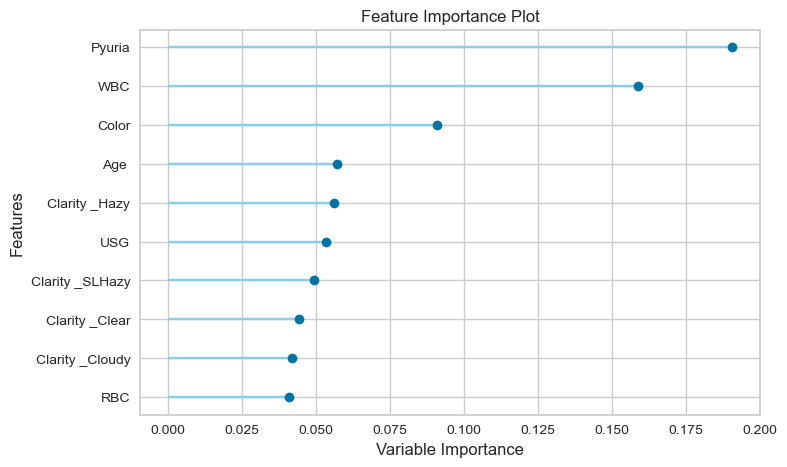

In [90]:
plot_model(et5, plot = 'feature')

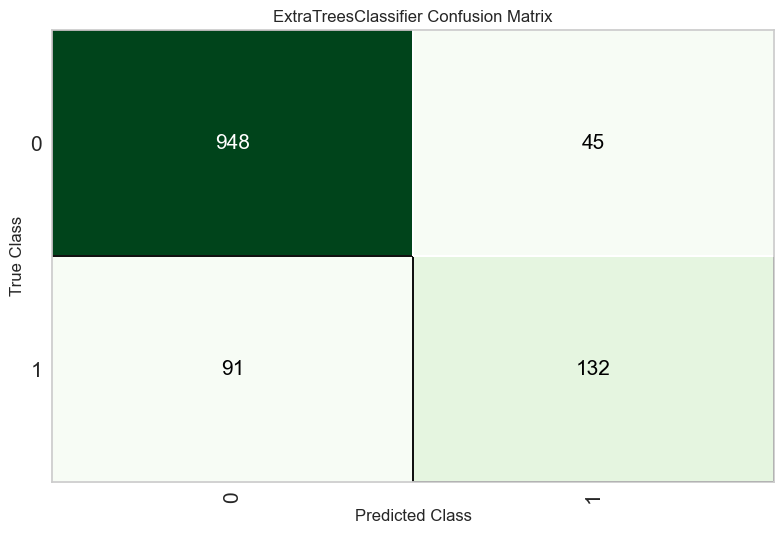

In [91]:
plot_model(et5 , plot = 'confusion_matrix')

In [92]:
#taken out all Epithelial*
data6 = pd.read_csv('no_eth.csv')
pd.options.display.max_columns = None
data6

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,Lipid Layer,WBC,Pyuria,RBC,Crystals,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,Not Present,0,0,0,0,0,0,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,Not Present,0,0,2,0,0,0,0,0,0,0
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,Not Present,0,0,0,0,0,0,0,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,Not Present,2,0,0,0,0,0,0,0,0,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,Not Present,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,Negative,3,0,5,1,1,0,0,0,0,0
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,Pos,3,0,8,0,1,0,0,0,0,0
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,Floc,3,0,8,0,0,0,0,0,0,0
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,Floc,3,0,5,0,0,0,0,0,2,1


In [93]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8667,0.7803,0.4758,0.6989,0.5653,0.4901,0.5031,0.1420
rf,Random Forest Classifier,0.8283,0.6985,0.3157,0.5675,0.3879,0.3026,0.3273,0.1420
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1040
lr,Logistic Regression,0.7930,0.7850,0.6472,0.4550,0.5330,0.4055,0.4170,0.1260
lda,Linear Discriminant Analysis,0.7884,0.7893,0.6647,0.4486,0.5345,0.4045,0.4185,0.1140
ridge,Ridge Classifier,0.7881,0.0000,0.6685,0.4477,0.5354,0.4052,0.4196,0.0990
qda,Quadratic Discriminant Analysis,0.7779,0.5528,0.1712,0.3645,0.1615,0.0828,0.1108,0.1040
knn,K Neighbors Classifier,0.7377,0.7228,0.5856,0.3668,0.4494,0.2899,0.3045,0.1030
svm,SVM - Linear Kernel,0.7377,0.0000,0.5780,0.4222,0.4656,0.3161,0.3305,0.1020
lightgbm,Light Gradient Boosting Machine,0.4897,0.5965,0.5216,0.1793,0.2572,-0.0038,0.0097,0.1100


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [94]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1045, verbose=0, warm_start=False)


In [95]:
et6 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8662,0.7942,0.5385,0.6667,0.5957,0.5167,0.5209
1,0.8908,0.8241,0.5962,0.7561,0.6667,0.6025,0.6086
2,0.8556,0.7265,0.4615,0.6486,0.5393,0.4566,0.4659
3,0.8451,0.7871,0.4423,0.6053,0.5111,0.4217,0.4290
4,0.8627,0.8040,0.4615,0.6857,0.5517,0.4743,0.4872
5,0.8732,0.7698,0.4615,0.7500,0.5714,0.5019,0.5223
6,0.8551,0.7342,0.3725,0.6786,0.4810,0.4050,0.4296
7,0.8551,0.7584,0.4808,0.6410,0.5495,0.4652,0.4721
8,0.8551,0.7841,0.4423,0.6571,0.5287,0.4470,0.4592


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [96]:
tuned_et6 = tune_model(et6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8345,0.8020,0.6731,0.5385,0.5983,0.4957,0.5006
1,0.8028,0.8577,0.7692,0.4762,0.5882,0.4679,0.4911
2,0.7923,0.7821,0.5577,0.4462,0.4957,0.3669,0.3706
3,0.8592,0.8414,0.6538,0.6071,0.6296,0.5428,0.5434
4,0.8204,0.8161,0.6154,0.5079,0.5565,0.4452,0.4484
5,0.8486,0.7896,0.6346,0.5789,0.6055,0.5121,0.5129
6,0.8339,0.7786,0.5882,0.5357,0.5607,0.4586,0.4594
7,0.8304,0.8115,0.6154,0.5333,0.5714,0.4664,0.4682
8,0.8198,0.8117,0.6538,0.5075,0.5714,0.4596,0.4655


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


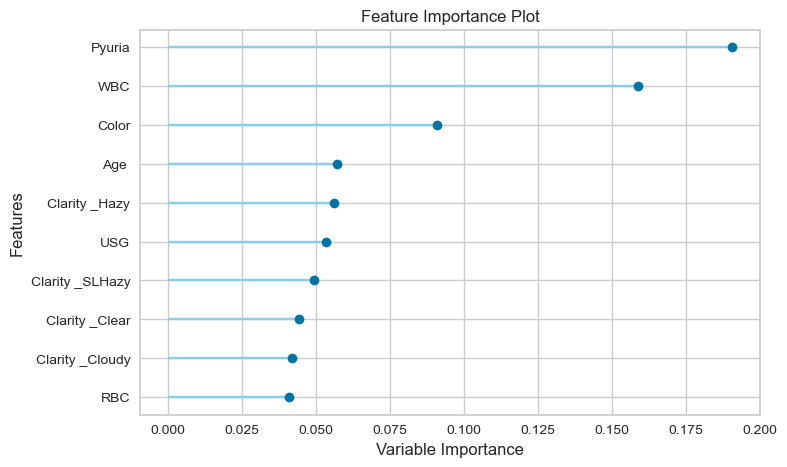

In [97]:
plot_model(et6, plot = 'feature')

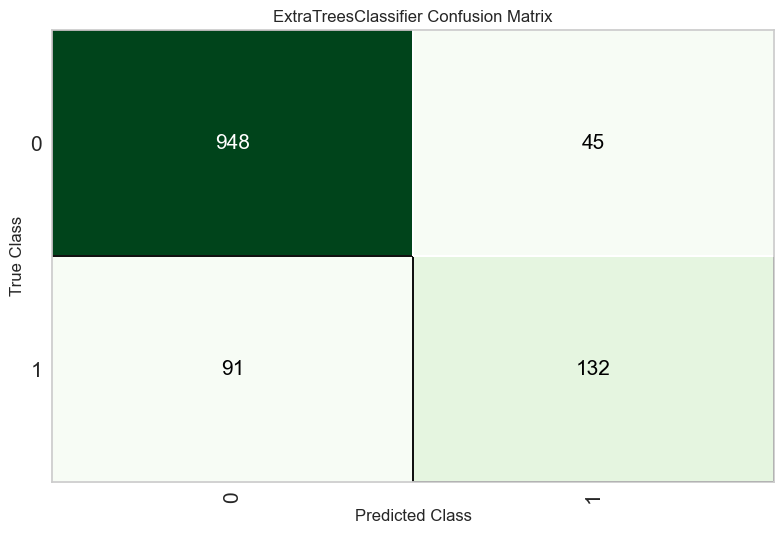

In [98]:
plot_model(et6 , plot = 'confusion_matrix')

In [ ]:
#taken out all Epithelial*
data7 = pd.read_csv('no_eth.csv')
pd.options.display.max_columns = None
data6